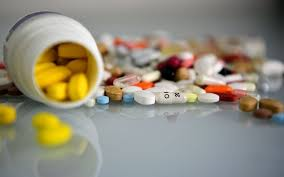

# Objective of This Notebook and Explanation of the Columns


About columns:

Age: Age of patient

Sex: Gender of patient

BP: Blood pressure of patient

Cholesterol: Cholesterol of patient

Na_to_K: Sodium to Potassium Ratio in Blood

Drug: Drug Type

This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.

In [1]:
# Importing the libararies that will be used  

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importing the data within our notebook

row_data = pd.read_csv("drug200.csv")
row_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
row_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
print(row_data["Sex"].unique())
print(row_data["BP"].unique())
print(row_data["Cholesterol"].unique())
print(row_data["Drug"].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [6]:
row_data.replace("DrugY", "drugY", inplace=True)
print(row_data["Drug"].unique())

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


## Visualization of the Columns

### Numerical Ones

<AxesSubplot:xlabel='Age'>

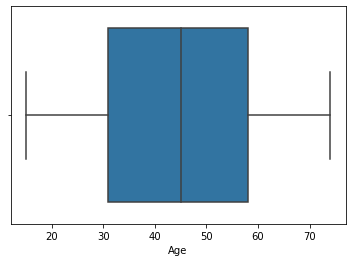

In [7]:
sns.boxplot(data=row_data, x="Age")

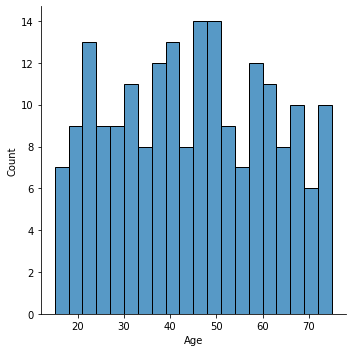

In [8]:
sns.displot(row_data, x="Age", binwidth=3)

<AxesSubplot:xlabel='Na_to_K'>

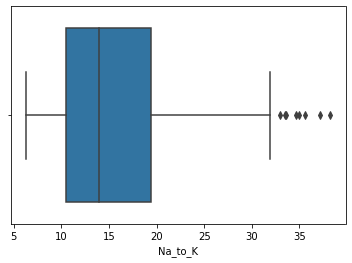

In [9]:
sns.boxplot(data=row_data, x="Na_to_K")

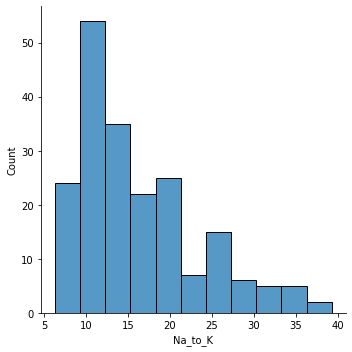

In [10]:
sns.displot(row_data, x="Na_to_K", binwidth=3)

As we see people's age distribution seems like bell-shaped whereas Na_to_K seems right-skewed.And this phenomenon gets supported by the box plots and row_data.describe() section.

### Categorical Ones

<AxesSubplot:xlabel='Sex', ylabel='count'>

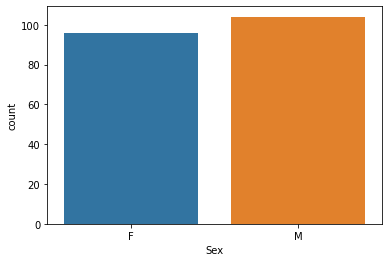

In [11]:
sns.countplot(data=row_data, x="Sex")

<AxesSubplot:xlabel='BP', ylabel='count'>

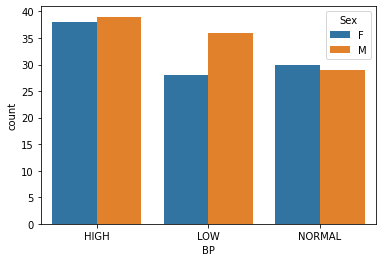

In [12]:
sns.countplot(data=row_data, x="BP", hue="Sex")

<AxesSubplot:xlabel='Drug', ylabel='count'>

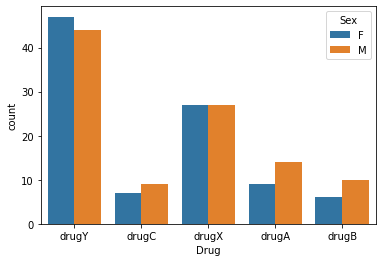

In [13]:
sns.countplot(data=row_data, x="Drug", hue="Sex")

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

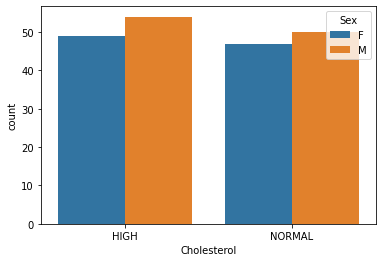

In [14]:
sns.countplot(data=row_data, x="Cholesterol", hue="Sex")

-Number of men greater than number of women.
-Patients mostly have high BP.
-drugY is the most used drug type among the other ones.
-Patients mostly have high Cholesterol.

### Categorical-Numerical Ones

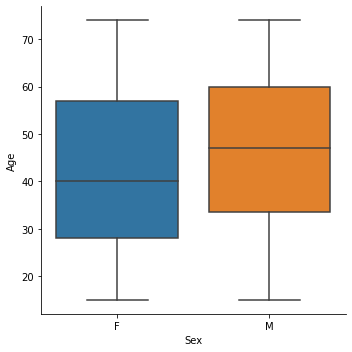

In [15]:
sns.catplot(data=row_data, x="Sex", y="Age", kind="box")

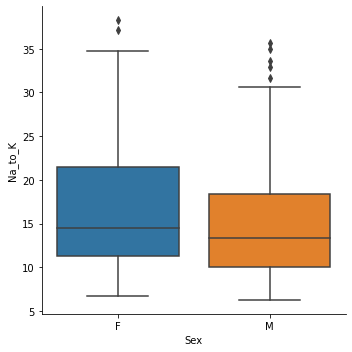

In [16]:
sns.catplot(data=row_data, x="Sex", y="Na_to_K", kind="box")

-Generally speaking,females' Na_to_K ratio is greater than males' ones.

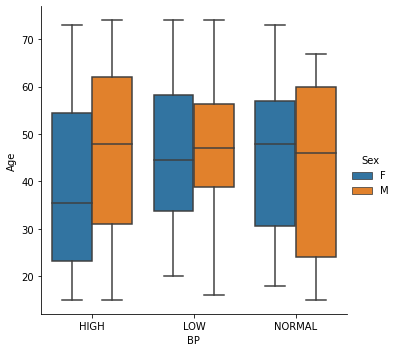

In [17]:
sns.catplot(data=row_data, x="BP", y="Age", hue="Sex", kind="box")

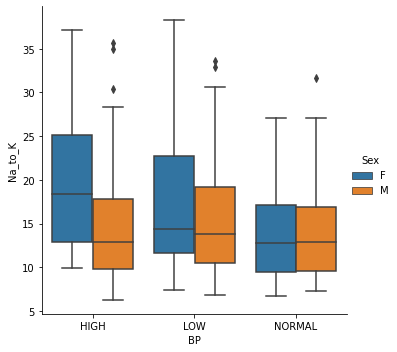

In [18]:
sns.catplot(data=row_data, x="BP", y="Na_to_K", hue="Sex", kind="box")

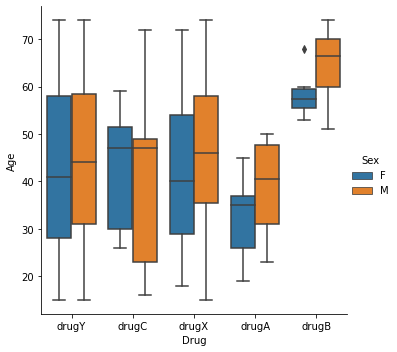

In [19]:
sns.catplot(data=row_data, x="Drug", y="Age", hue="Sex", kind="box")

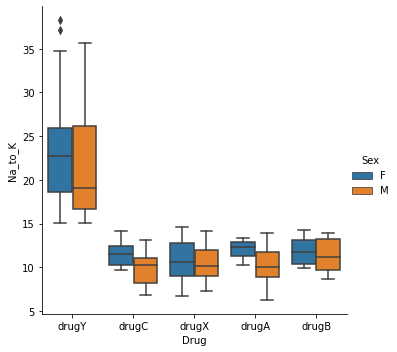

In [20]:
sns.catplot(data=row_data, x="Drug", y="Na_to_K", hue="Sex", kind="box")

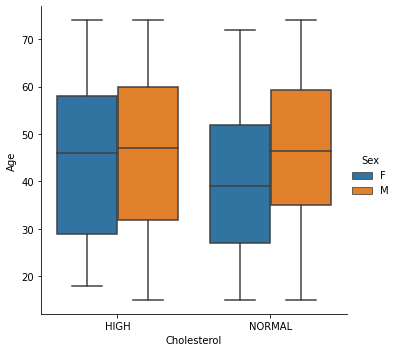

In [21]:
sns.catplot(data=row_data, x="Cholesterol", y="Age", hue="Sex", kind="box")

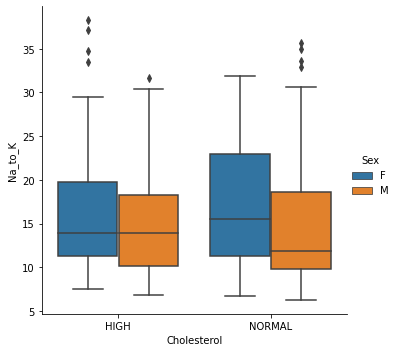

In [22]:
sns.catplot(data=row_data, x="Cholesterol", y="Na_to_K", hue="Sex", kind="box")

## Modelling Part

In [23]:
# Here X will be the DataFrame that contains predictors whereas y will be the target.

X = row_data.drop(["Drug"], axis=1)
y = row_data["Drug"]



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
# Since I want to see the effect of categorical variables on predicting the drug type,I must convert those
# categorical variables into numerical ones.


X_train = pd.get_dummies(X_train, drop_first=True)

X_test = pd.get_dummies(X_test, drop_first=True)

In [26]:
X_test.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
95,36,11.424,1,1,0,1
15,16,15.516,0,0,0,1
30,18,8.750,0,0,1,1
158,59,10.444,0,1,0,0
128,47,33.542,1,1,0,1


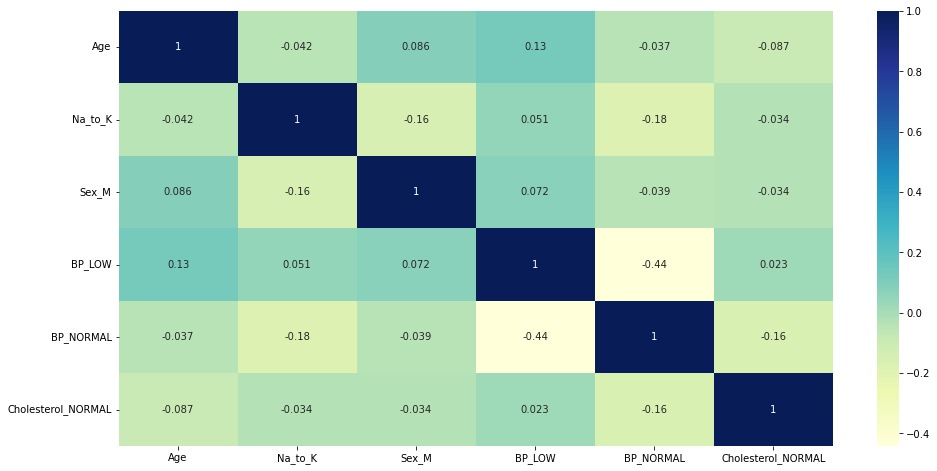

In [27]:
# Let's see correlation of the predictors.

plt.figure(figsize=(16,8))

sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

plt.show()

#### Logistic Regression

First we will begin with Logistic Regression model to predict drug type based on some variables.


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000, solver='liblinear')

In [29]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.875

Here we got an idea about performance of our classification model.
But everytime high accuracy_score does not  mean we have a nice model.Because of this reason we need better metrics to measure our performance of classification model such as confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=row_data["Drug"].unique())

cm_df = pd.DataFrame(cm)

cm_df

,0,1,2,3,4
0,15,0,0,0,0
1,1,4,0,0,0
2,0,0,11,0,0
3,4,0,0,2,0
4,0,0,0,0,3


In [31]:
row_data["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [32]:
"""I've taken the function that is given below from shaypal5"""

#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Note that due to returning the created figure object, when this funciton is called in a
    notebook the figure willl be printed twice. To prevent this, either append ; to your
    function call, or modify the function by commenting out the return expression.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Note that due to returning the created figure object, when this funciton is called in a notebook
    # the figure willl be printed twice. To prevent this, either append ; to your function call, or
    # modify the function by commenting out this return expression.
    # return fig

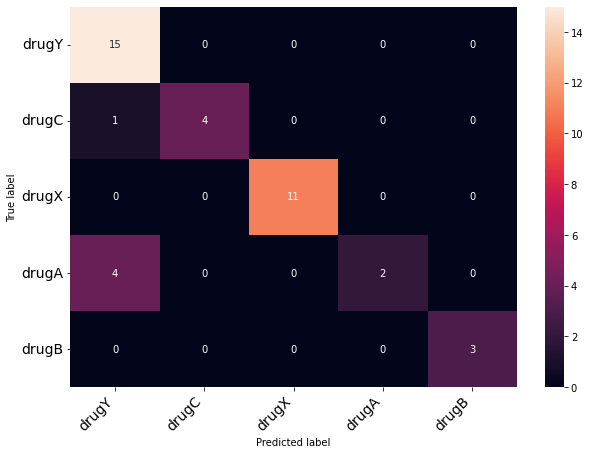

In [33]:
print_confusion_matrix(cm, ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], figsize = (10,7), fontsize=14)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      0.33      0.50         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11
       drugY       0.75      1.00      0.86        15

    accuracy                           0.88        40
   macro avg       0.95      0.83      0.85        40
weighted avg       0.91      0.88      0.86        40



#### K nearest neighbors classification

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
knn.score(X_test, y_test)

0.675